In [1]:
import os
import pathlib

import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly_resampler import unregister_plotly_resampler

from neuralprophet import NeuralProphet, set_random_seed

In [2]:
def create_metrics_plot(metrics):
    # Deactivate the resampler since it is not compatible with kaleido (image export)
    unregister_plotly_resampler()

    # Plotly params
    prediction_color = "#2d92ff"
    actual_color = "black"
    line_width = 2
    xaxis_args = {"showline": True, "mirror": True, "linewidth": 1.5, "showgrid": False}
    yaxis_args = {
        "showline": True,
        "mirror": True,
        "linewidth": 1.5,
        "showgrid": False,
        "rangemode": "tozero",
        "type": "log",
    }
    layout_args = {
        "autosize": True,
        "template": "plotly_white",
        "margin": go.layout.Margin(l=0, r=10, b=0, t=30, pad=0),
        "font": dict(size=10),
        "title": dict(font=dict(size=10)),
        "width": 1000,
        "height": 200,
    }

    metric_cols = [col for col in metrics.columns if not ("_val" in col or col == "RegLoss" or col == "epoch")]
    fig = make_subplots(rows=1, cols=len(metric_cols), subplot_titles=metric_cols)
    for i, metric in enumerate(metric_cols):
        fig.add_trace(
            go.Scatter(
                y=metrics[metric],
                name=metric,
                mode="lines",
                line=dict(color=prediction_color, width=line_width),
                legendgroup=metric,
            ),
            row=1,
            col=i + 1,
        )
        if f"{metric}_val" in metrics.columns:
            fig.add_trace(
                go.Scatter(
                    y=metrics[f"{metric}_val"],
                    name=f"{metric}_val",
                    mode="lines",
                    line=dict(color=actual_color, width=line_width),
                    legendgroup=metric,
                ),
                row=1,
                col=i + 1,
            )
        if metric == "Loss":
            fig.add_trace(
                go.Scatter(
                    y=metrics["RegLoss"],
                    name="RegLoss",
                    mode="lines",
                    line=dict(color=actual_color, width=line_width),
                    legendgroup=metric,
                ),
                row=1,
                col=i + 1,
            )
    fig.update_xaxes(xaxis_args)
    fig.update_yaxes(yaxis_args)
    fig.update_layout(layout_args)
    return fig

In [3]:
DIR = "~/github/neural_prophet"
DATA_DIR = os.path.join(DIR, "tests", "test-data")
houston_file = os.path.join(DATA_DIR, "houston_hourly_energy_price.csv")

<Axes: >

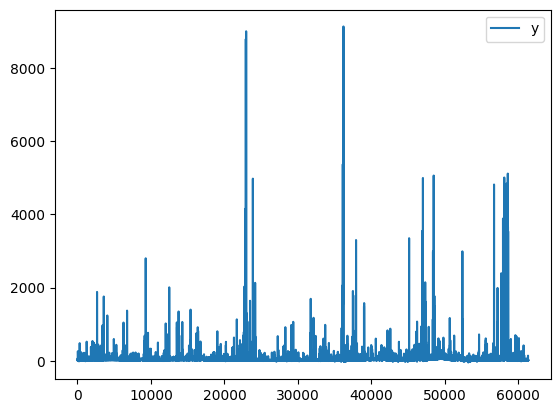

In [4]:
df = pd.read_csv(houston_file)
# df["y"] = np.log(1 + df["y"].apply(lambda x: max(0, x)))
df.plot()

In [5]:
m = NeuralProphet(
    changepoints_range=5.0 / 6.0,
    n_changepoints=5,
    yearly_seasonality=3,
    weekly_seasonality=6,
    daily_seasonality=8,
    n_lags=72,
    n_forecasts=24,
    ar_layers=[16, 8],
    newer_samples_weight=1,
    # quantiles=[0.05, 0.95],
)
m.add_country_holidays("US", lower_window=1, upper_window=1)

INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.976% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


<Axes: >

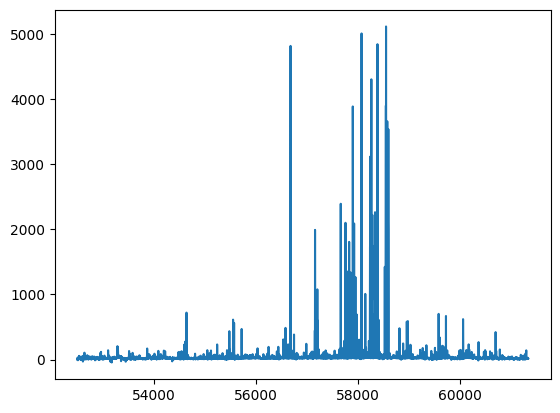

In [6]:
df_train, df_test = m.split_df(df=df, freq="H", valid_p=1.0 / 7.0)
df_test["y"].plot()

In [7]:
metrics = m.fit(df_train, validation_df=df_test, freq="H")  # , early_stopping=True)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.973% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 256
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 30
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (205) is too small than the required number                     for the learning rate finder (268). The results might not be optimal.


Finding best initial lr:   0%|          | 0/268 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [8]:
create_metrics_plot(metrics)

In [9]:
metrics.to_dict("records")[-1]

{'MAE_val': 55.91935729980469,
 'RMSE_val': 143.0417938232422,
 'Loss_val': 0.34935295581817627,
 'RegLoss_val': 0.0,
 'epoch': 29,
 'MAE': 22.39556884765625,
 'RMSE': 172.39874267578125,
 'Loss': 0.14141444861888885,
 'RegLoss': 0.0}

In [10]:
metrics.tail(1)

,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,MAE,RMSE,Loss,RegLoss
29,55.919357,143.041794,0.349353,0.0,29,22.395569,172.398743,0.141414,0.0


In [11]:
forecast = m.predict(df_test)

INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.977% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.977% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H


Predicting: 205it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [12]:
m = m.highlight_nth_step_ahead_of_each_forecast(12)

In [13]:
m.plot(forecast)

FigureWidgetResampler({
    'data': [{'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': '<b style="color:sandybrown">[R]</b> Predicted <i style="color:#fc9944">~9h</i>',
              'type': 'scatter',
              'uid': 'c27d64b5-1987-4320-afa5-5cbd4c139a18',
              'x': array([datetime.datetime(2023, 1, 1, 1, 55),
                          datetime.datetime(2023, 1, 1, 5, 55),
                          datetime.datetime(2023, 1, 1, 13, 55), ...,
                          datetime.datetime(2023, 12, 31, 0, 54),
                          datetime.datetime(2023, 12, 31, 7, 54),
                          datetime.datetime(2023, 12, 31, 10, 54)], dtype=object),
              'y': array([34.665623, 40.9706  , 52.821003, ..., 50.58447 , 56.104176, 62.45432 ],
                         dtype=float32)},
             {'marker': {'color': 'blue', 'size': 4, 'symbol': 'x'},
              'mode': 'markers',
              'name': '<b style="col

In [14]:
m.plot_components(forecast)

FigureWidgetResampler({
    'data': [{'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': '<b style="color:sandybrown">[R]</b> Trend <i style="color:#fc9944">~9h</i>',
              'showlegend': False,
              'type': 'scatter',
              'uid': '54c5721b-2024-4bc5-ae07-21cd001be875',
              'x': array([datetime.datetime(2022, 12, 31, 14, 55),
                          datetime.datetime(2022, 12, 31, 21, 55),
                          datetime.datetime(2022, 12, 31, 23, 55), ...,
                          datetime.datetime(2023, 12, 31, 11, 54),
                          datetime.datetime(2023, 12, 31, 13, 54),
                          datetime.datetime(2023, 12, 31, 22, 54)], dtype=object),
              'xaxis': 'x',
              'y': array([50.870327, 50.882442, 50.88592 , ..., 66.041824, 66.0453  , 66.06088 ],
                         dtype=float32),
              'yaxis': 'y'},
             {'line': {'color': '#2d92ff'

In [15]:
m.plot_parameters()

FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': '<b style="color:sandybrown">[R]</b> Trend <i style="color:#fc9944">~2D</i>',
              'type': 'scatter',
              'uid': 'f1a43bd3-51b1-4cb8-b8d5-e83d690d629b',
              'x': array([datetime.datetime(2017, 1, 1, 0, 0),
                          datetime.datetime(2017, 1, 2, 23, 0),
                          datetime.datetime(2017, 1, 5, 7, 0), ...,
                          datetime.datetime(2022, 12, 29, 6, 0),
                          datetime.datetime(2022, 12, 31, 5, 0),
                          datetime.datetime(2022, 12, 31, 13, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([26.76852091, 26.74113525, 26.70850554, ..., 50.77171061, 50.85313829,
                          50.86699832]),
              'yaxis': 'y'},
             {'marker': {'color': '#2d92ff'},
              'nam